In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import r2_score

In [2]:
features = ['Rect1Height', 'Rect1Width', 'Rect2Height', 'Rect2Width', 'Rect3Height', 'Rect3Width']
data = pd.read_csv('data/E1a.csv')

## Train a model

In [3]:
def predict_user(usr):
    def get_freq(x):
        hist, _ = np.histogram(x, 3)
        return hist/hist.sum()
    
    d = data[(data.username == usr)]
    train = d[d.blkNum <= 5]
    test = d[d.blkNum < 5]
    X_train = train[features].values
    X_test = test[features].values
    y_train = train.response.values
    y_test = test.response.values
    
#     model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
#     model = RandomForestClassifier(n_estimators=100)
#     model = tree.DecisionTreeClassifier(max_depth=5)
    model = SVC(probability=True, gamma='auto')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    actual_freq = get_freq(y_test)
    pred_freq = model.predict_proba(X_test).mean(0) # get_freq(pred)
    return actual_freq, pred_freq, ((actual_freq - pred_freq) ** 2).mean()

In [4]:
MSE = []
actual = []
pred = []
for usr in data.username.unique():
    actual_freq, pred_freq, mse = predict_user(usr)
    MSE.append(mse)
    actual.append(actual_freq)
    pred.append(pred_freq)
    print(actual_freq, pred_freq, mse)
    
actual = np.array(actual)
pred = np.array(pred)

[0.72083333 0.22083333 0.05833333] [0.68473122 0.24432229 0.07094649] 0.0006713952700371694
[0.51666667 0.425      0.05833333] [0.4940943  0.44506004 0.06084565] 0.0003060761798973008
[0.26068376 0.71794872 0.02136752] [0.31301776 0.66667415 0.02030809] 0.001789683635512373
[0.52941176 0.45378151 0.01680672] [0.50660498 0.47682029 0.01657473] 0.0003503294330125268
[0.19911504 0.7920354  0.00884956] [0.2174895  0.77073808 0.01177241] 0.000266579860085846
[0.39166667 0.34583333 0.2625    ] [0.3601957  0.34520235 0.29460195] 0.000673785058784114
[0.44303797 0.44725738 0.10970464] [0.44675768 0.45086264 0.10237968] 2.6829696479735955e-05
[0.6625 0.2625 0.075 ] [0.67917898 0.2511499  0.06967112] 0.00014513669995269216
[0.65833333 0.3        0.04166667] [0.64805205 0.29966349 0.05228446] 7.285186494199995e-05
[0.43514644 0.51882845 0.0460251 ] [0.4893198  0.46846458 0.04221562] 0.0018285945650231394
[0.32083333 0.61666667 0.0625    ] [0.35016134 0.58137469 0.06846397] 0.0007137414839294511
[

(0, 1)

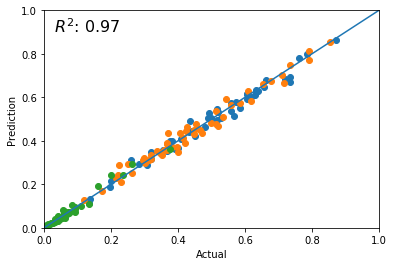

In [5]:
r_2 = 0
for i in range(3):
    x, y = actual[:, i], pred[:, i]
    r_2 += r2_score(x, y)
    plt.scatter(x, y)
r_2 /= 3
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.text(0.03, 0.9, f'$R^2$: {r_2:0.2f}', fontsize=16)
plt.plot([0, 1], [0, 1])
plt.xlim(0, 1)
plt.ylim(0, 1)